In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data.csv')

FileNotFoundError: File b'data.csv' does not exist

In [8]:
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
2309,GMC,Canyon,2016,regular unleaded,305.0,6.0,AUTOMATIC,four wheel drive,4.0,Diesel,Compact,Crew Cab Pickup,24,17,549,34720
3122,Honda,Crosstour,2015,regular unleaded,192.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Hatchback",Midsize,4dr Hatchback,31,22,2202,31215
5128,Infiniti,G20,2002,regular unleaded,145.0,4.0,AUTOMATIC,front wheel drive,4.0,Luxury,Compact,Sedan,23,20,190,22195
3251,Cadillac,CTS,2015,flex-fuel (unleaded/E85),321.0,6.0,AUTOMATIC,all wheel drive,4.0,"Flex Fuel,Luxury,Performance",Large,Sedan,26,18,1624,59370
11543,Scion,xB,2013,regular unleaded,158.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Wagon,28,22,105,17920


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [7]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [11]:
#Reformating the columns and the values
df.columns = df.columns.str.lower().str.replace(' ', '_')

headers = list(df.dtypes[df.dtypes == 'object'].index)
for x in headers:
    df[x] = df[x].str.lower().str.replace(' ', '_')

In [12]:
df.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350


# -  Exploratory Analysis

<Figure size 720x360 with 0 Axes>

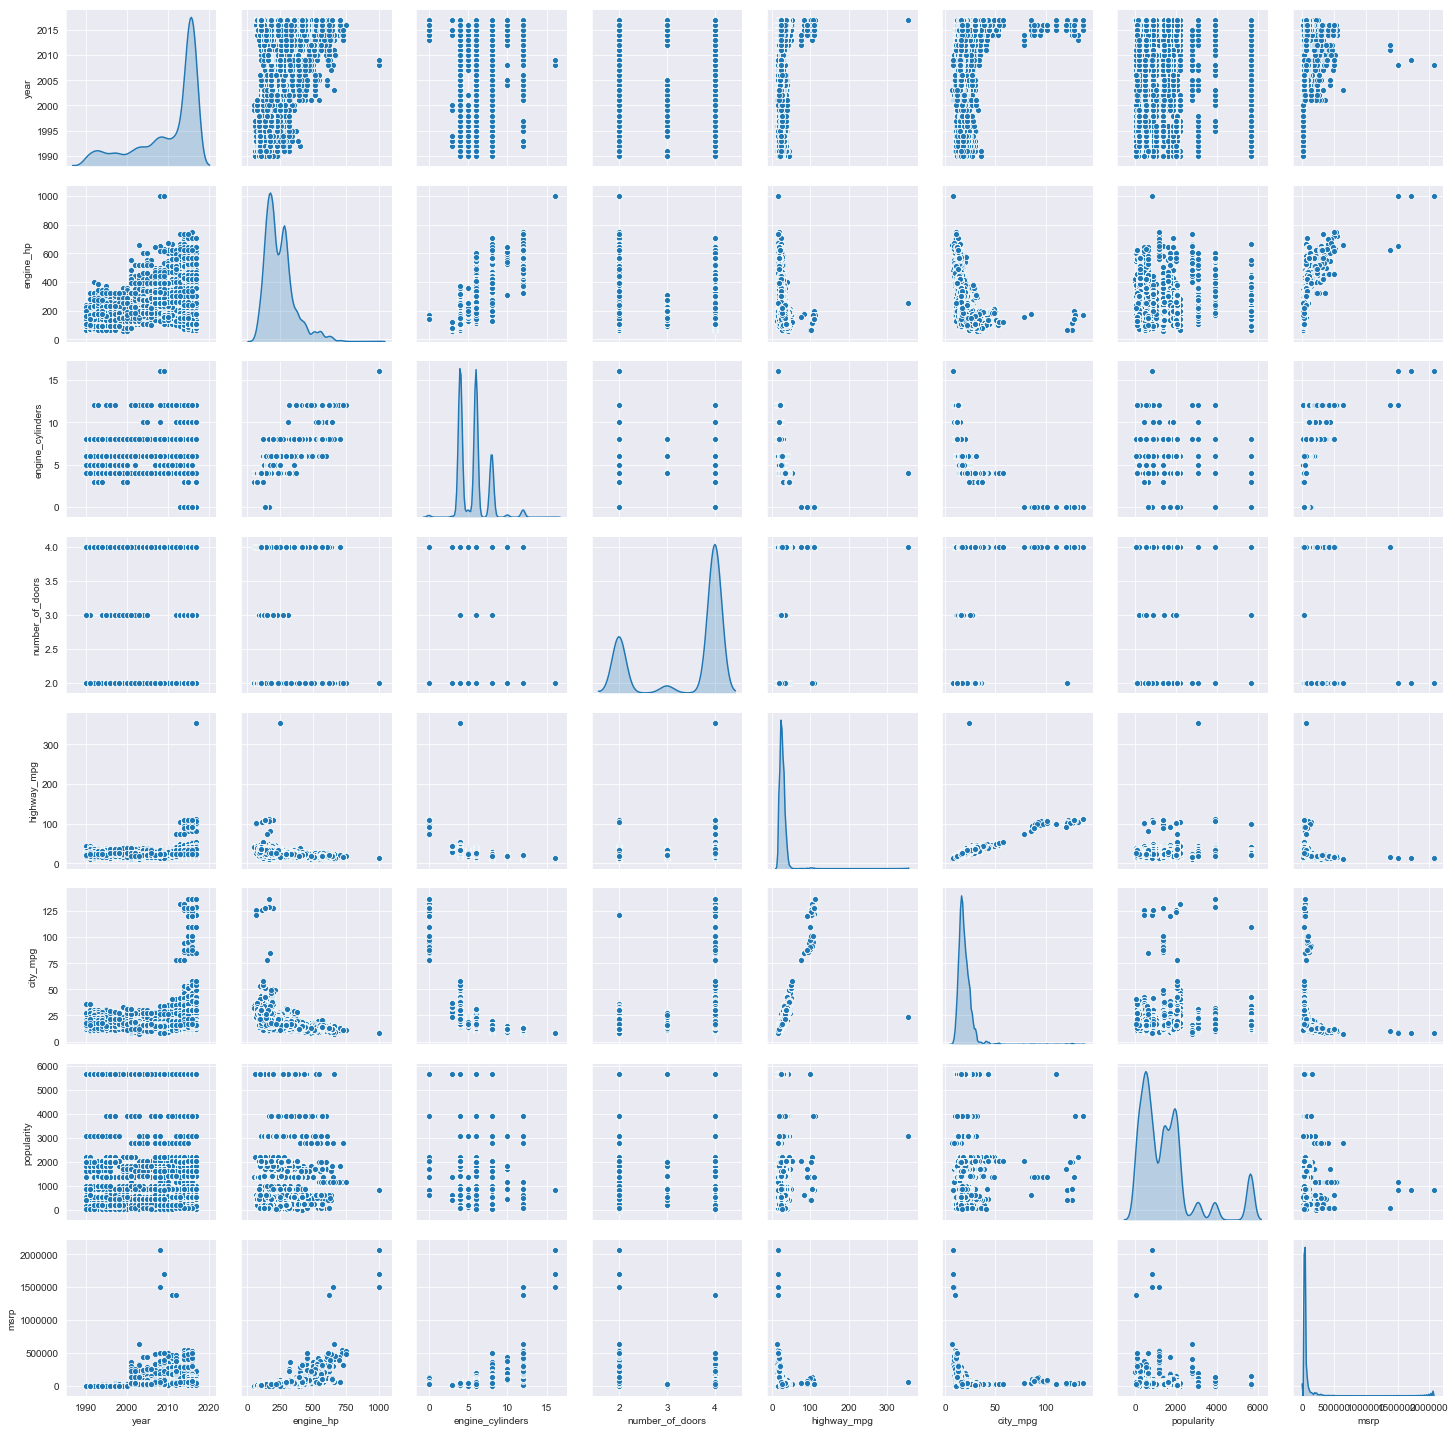

In [155]:
plt.figure(figsize = (10,5))
sns.pairplot(df, diag_kind = 'kde')

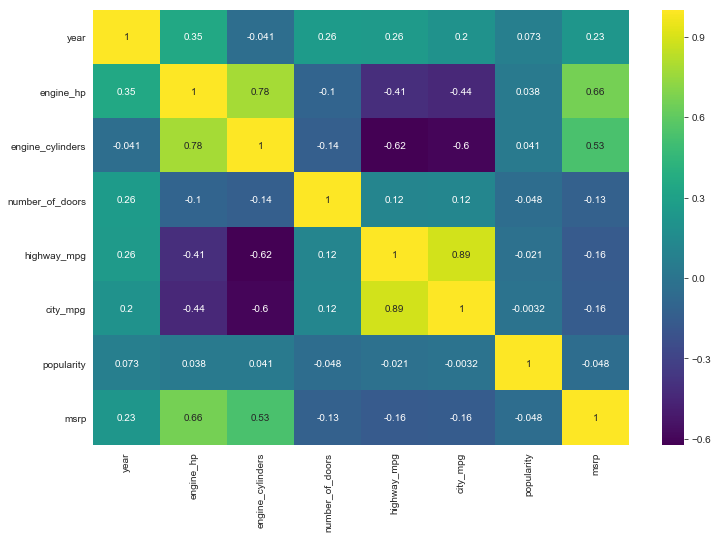

In [490]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

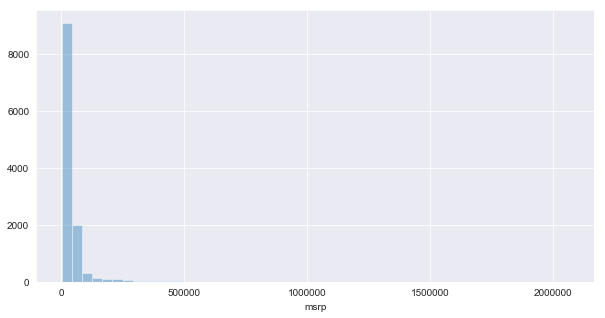

In [491]:
""""for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()"""

#distribution of price
plt.figure(figsize = (10,5))
sns.set_style('darkgrid')
sns.distplot(df['msrp'], bins = 50, kde = False)

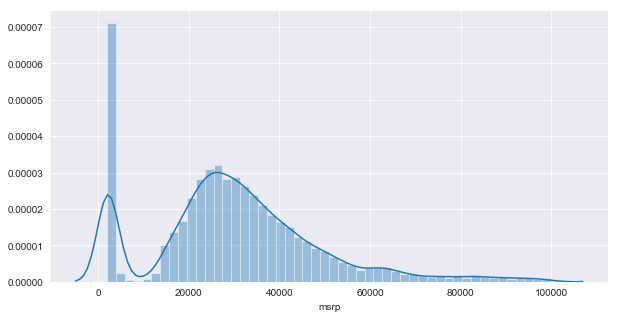

In [492]:
plt.figure(figsize = (10,5))
sns.set_style('darkgrid')
sns.distplot(df.msrp[df.msrp < 100000], bins = 50)

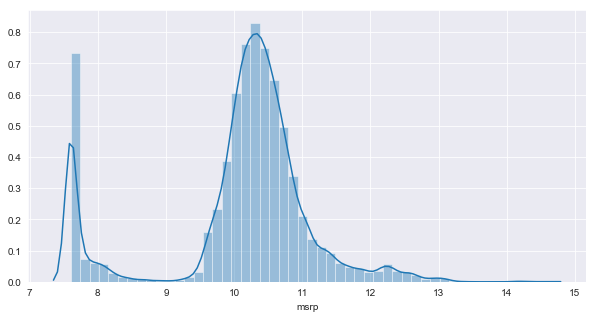

In [493]:
#apply log tranformation to the price column
plt.figure(figsize = (10,5))
sns.set_style('darkgrid')
car_prices_logs = np.log1p(df.msrp)
sns.distplot(car_prices_logs, bins =50)

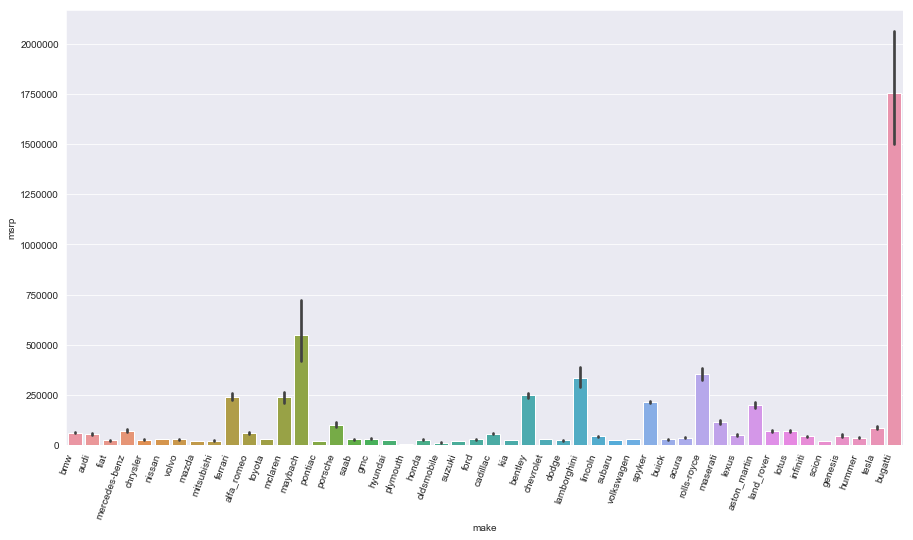

In [494]:
#Different car models and their prices
plt.figure(figsize = (15,8))
sns.set_style('darkgrid')
sns.barplot(x = 'make', y = 'msrp', data = df)
plt.xticks(rotation = 70, horizontalalignment = 'right');

# Validation Framework
-Train, Validation and Test split

In [14]:
#Calculate the percentage for each split
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(n, n_train, n_val, n_test)
print('\n')
print(n, n_train + n_val + n_test)

11914 7150 2382 2382


11914 11914


In [15]:
#assign each split to the datasets
np.random.seed(5)
idx = np.arange(n)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [16]:
df_train =df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [17]:
y_train = np.log1p(df_train.msrp.values)
y_val =  np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# Model(Linear Regression)

In [18]:
xi = [443, 16, 86]
w0 = 7.17

w = [0.01, 0.04, 0.002]

In [19]:
""""def g(xi):
   Simple Linear Regression
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred
    """

'"def g(xi):\n   Simple Linear Regression\n    n = len(xi)\n    \n    pred = w0\n    \n    for j in range(n):\n        pred = pred + w[j] * xi[j]\n    return pred\n    '

In [23]:
#Linear regression
def dot(xi, w):
    n = len(xi)
    
    result = 0.0
    for j in range(n):
        result = result + xi[j] * w[j]
    return result

def Linear_regression(xi):
    return w0 + dot(xi, w)

In [24]:
def Linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [25]:
w_new = [w0] + w

w0 = 7.17
w = [0.01, 0.04, 0.002]

In [27]:
x1 = [1, 148, 24, 856]
x2 = [1, 354, 16, 457]
x3 = [1, 556, 18, 370]

x = [x1, x2, x3]
X = np.array(x)
X

array([[  1, 148,  24, 856],
       [  1, 354,  16, 457],
       [  1, 556,  18, 370]])

In [28]:
#apply the model to the generated features
def Linear_regresson(x):
    return np.expm1(x.dot(w_new))

# Train Linear regression

In [29]:
#Let's come up with a matrix
X = [
     [148, 24, 856],
     [354, 16, 457],
     [556, 18, 370],
     [127, 34, 745],
     [357, 19, 550],
     [600, 20, 300],
     [158, 40, 200],
     [164, 14, 800],
     [240, 21, 390],  
]
X = np.array(X)
y = [200, 100, 250, 300, 350, 150, 280, 310, 360]
X

array([[148,  24, 856],
       [354,  16, 457],
       [556,  18, 370],
       [127,  34, 745],
       [357,  19, 550],
       [600,  20, 300],
       [158,  40, 200],
       [164,  14, 800],
       [240,  21, 390]])

In [30]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    #Implement Gram Matrix
    xtx = X.T.dot(X)
    xtx_inv = np.linalg.inv(xtx)
   #xtx.dot(xtx_inv).round(1)
    w_full = xtx_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [32]:
train_linear_regression(X,y)

(411.52282343120027, array([-0.28827732, -1.25394903, -0.07838262]))

# Car Price baseline model

In [33]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [34]:
base = ['engine_hp', 'highway_mpg', 'city_mpg', 'popularity', 'engine_cylinders']

In [36]:

X_train = df_train[base].values
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train,y_train)

In [37]:
y_pred = w0 + X_train.dot(w)

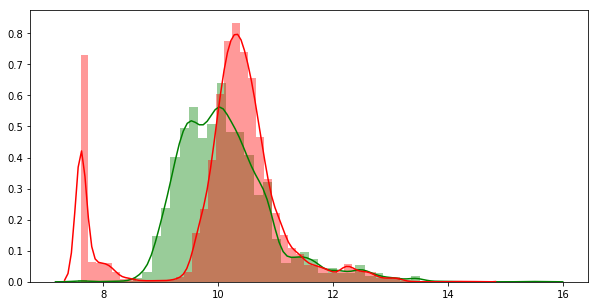

In [38]:
plt.figure(figsize = (10, 5))
sns.distplot(y_pred, color = 'green', bins = 50)
sns.distplot(y_train, color = 'red', bins = 50)


# Root Mean Squared Error(RMSE)

In [39]:
def rmse(y, y_train):
    se = (y- y_train)**2
    mse = se.mean()
    return np.sqrt(mse)

rmse(y_pred, y_train)

0.7494783449748382

# Validate model

In [40]:
base = ['engine_hp', 'highway_mpg', 'city_mpg', 'popularity', 'engine_cylinders']
X_train = df_train[base].values
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train,y_train)

y_pred = w0 + X_train.dot(w)

In [41]:
def prepare_x(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [42]:
X_train = prepare_x(df_train)

w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.7580590021748519

# Feature Engineering

In [43]:
#Let's add the year column to the dataset
def prepare_x(df):
    df = df.copy()
    df['age'] = 2017- df.year
    
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [44]:
X_train = prepare_x(df_train)

In [45]:
X_train = prepare_x(df_train)

w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5034941452073705

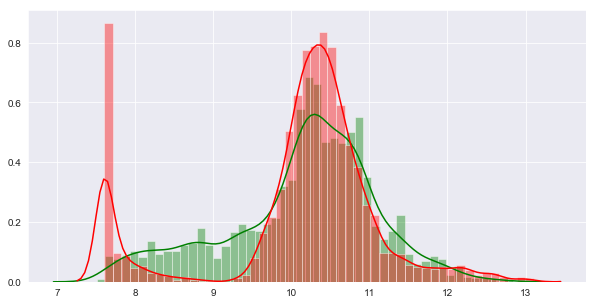

In [47]:
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')
sns.distplot(y_pred, color = 'green', bins = 50)
sns.distplot(y_val, color = 'red', bins = 50)


add more variables

In [48]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()
    
    
    df['age'] = 2017- df.year
    features.append('age')
    
    for q in [2, 3, 4]:
        df['num_of_doors %s' % q] = (df.number_of_doors == q).astype('int')
        features.append('num_of_doors %s' % q)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


In [49]:
X_train = prepare_x(df_train)

w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.502591356111441

In [50]:
makes = list(df.make.value_counts().head().index)

def prepare_x(df):
    df = df.copy()
    features = base.copy()
    
    
    df['age'] = 2017- df.year
    features.append('age')
    
    for q in [2, 3, 4]:
        df['num_of_doors %s' % q] = (df.number_of_doors == q).astype('int')
        features.append('num_of_doors %s' % q)
    for q in makes:
        df['makes_%s' % q] = (df.make == q).astype('int')
        features.append('makes_%s' % q)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [51]:
X_train = prepare_x(df_train)

w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.49634799569509797

In [52]:
cart = ['market_category', 'transmission_type', 'driven_wheels', 
              'vehicle_size', 'vehicle_style', 'engine_fuel_type', 'make']

In [53]:
categories = {}

for c in cart:
    categories[c] = list(df[c].value_counts().head().index)

In [54]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()
    
    
    df['age'] = 2017- df.year
    features.append('age')
    
    for q in [2, 3, 4]:
        df['num_of_doors %s' % q] = (df.number_of_doors == q).astype('int')
        features.append('num_of_doors %s' % q)
    for c, values in categories.items():
        for q in values:
            df[' %s_%s' % (c,q)] = (df[c] == q).astype('int')
            features.append(' %s_%s' %(c,q))
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [55]:
X_train = prepare_x(df_train)

w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

319.730387994219

# Regularization

In [56]:
#add a value to the diagonal
def train_linear_regression_reg(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    #Implement Gram Matrix
    xtx = X.T.dot(X)
    xtx = xtx + r * np.eye(xtx.shape[0])
    xtx_inv = np.linalg.inv(xtx)
   #xtx.dot(xtx_inv).round(1)
    w_full = xtx_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [57]:
X_train = prepare_x(df_train)

w0, w = train_linear_regression_reg(X_train,y_train, r = 0.01)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.447656092990239

# Tuning the model

In [58]:
#find the best value for r
for r in [0.0, 0.0001, 0.001, 0.00001, 0.1, 1, 10, 100]:
    X_train = prepare_x(df_train)
    w0, w = train_linear_regression_reg(X_train,y_train, r = r)
    
    X_val = prepare_x(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 -1.225515999928936e+17 319.730387994219
0.0001 6.330275156450333 0.4476515193644652
0.001 6.274010219184822 0.447651924230231
1e-05 -14.766356863573424 0.4476514987305355
0.1 6.150270544707002 0.4477109078029763
1 5.520225000561034 0.44864764153357384
10 4.241695781850196 0.4619435325767261
100 2.509852649321793 0.5646192829188432


In [59]:
r = 0.001
X_train = prepare_x(df_train)
w0, w = train_linear_regression_reg(X_train,y_train, r = r)
X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.447651924230231

# Use the model

In [67]:
df_full_train = pd.concat([df_train, df_val])
y_full_train = np.concatenate([y_train, y_val])
df_full_train = df_full_train.reset_index(drop = True)

In [68]:
X_full_train = prepare_x(df_full_train)

In [70]:
w0, w = train_linear_regression_reg(X_full_train,y_full_train, r = r)

In [73]:
X_test= prepare_x(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.4587898058570775

In [76]:
#let's use the model to predict the price of a car..
car = df_test.iloc[20].to_dict()
df_car = pd.DataFrame([car])
df_car

In [82]:
X_small = prepare_x(df_car)
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]

In [83]:
np.expm1(y_pred) #Predicted price of the car

24439.228952969966

In [87]:
np.expm1(y_test[20]) #actual price of the car

28480.00000000002

In [86]:
#Conclusion
#This is a full linear regression model implementation 
#and it's helped in predicitng the price of a car.


